In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [23]:
df = pd.read_excel("C:\\Users\\oem\\datasets\\iris-dataset.xlsx", header = 0)

df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
data = np.array(df, dtype=np.float32)

x_data = data[:, 0:-1]  

y_data = data[:, [-1]]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2)

In [25]:
import lightgbm as lgb
from sklearn import metrics

# Convert the data into LightGBM Dataset format
train_data = lgb.Dataset(x_train, label=y_train)
test_data = lgb.Dataset(x_test, label=y_test, reference=train_data)

# Set LightGBM parameters
params = {
    'objective': 'multiclass',
    'num_class': 3,
    'metric': 'multi_logloss',
    'boosting_type': 'goss',  # GOSS
    'learning_rate': 0.1,
    'num_leaves': 31,
    'top_rate': 0.2,  # GOSS a: The proportion of large gradient samples
    'other_rate': 0.1  # GOSS b: The proportion of the rest samples
}

# Train the LightGBM model
lgb_model = lgb.train(params, train_data, valid_sets=[train_data, test_data], num_boost_round = 50, early_stopping_rounds=10)

# Make predictions on the test set
y_train_predictions = lgb_model.predict(x_train, num_iteration=lgb_model.best_iteration)
y_train_pred = y_train_predictions.argmax(axis=1)
y_test_predictions = lgb_model.predict(x_test, num_iteration=lgb_model.best_iteration)
y_test_pred = y_test_predictions.argmax(axis = 1)

# Evaluate the accuracy of the model
train_acc = metrics.accuracy_score(y_train_pred, y_train)
test_acc = metrics.accuracy_score(y_test_pred, y_test)

print(f'Train Accuracy: {train_acc:.3f}')
print(f'Test Accuracy: {test_acc:.3f}')

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 4
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score -1.123930
[LightGBM] [Info] Start training from score -1.073920
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	training's multi_logloss: 0.932644	valid_1's multi_logloss: 0.937733
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

C:\Users\oem\.conda\envs\TF_v2\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\oem\.conda\envs\TF_v2\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


In [26]:
for p, y in zip(y_test, y_test_pred):
    print("[{}] Test: {} Prediction Y: {}".format(p == int(y), p, int(y))) 

[[ True]] Test: [2.] Prediction Y: 2
[[ True]] Test: [2.] Prediction Y: 2
[[ True]] Test: [0.] Prediction Y: 0
[[ True]] Test: [1.] Prediction Y: 1
[[ True]] Test: [0.] Prediction Y: 0
[[ True]] Test: [0.] Prediction Y: 0
[[ True]] Test: [2.] Prediction Y: 2
[[ True]] Test: [2.] Prediction Y: 2
[[ True]] Test: [1.] Prediction Y: 1
[[ True]] Test: [0.] Prediction Y: 0
[[ True]] Test: [2.] Prediction Y: 2
[[ True]] Test: [0.] Prediction Y: 0
[[ True]] Test: [1.] Prediction Y: 1
[[False]] Test: [1.] Prediction Y: 2
[[ True]] Test: [1.] Prediction Y: 1
[[ True]] Test: [0.] Prediction Y: 0
[[ True]] Test: [0.] Prediction Y: 0
[[ True]] Test: [1.] Prediction Y: 1
[[ True]] Test: [2.] Prediction Y: 2
[[ True]] Test: [0.] Prediction Y: 0
[[ True]] Test: [2.] Prediction Y: 2
[[ True]] Test: [0.] Prediction Y: 0
[[ True]] Test: [1.] Prediction Y: 1
[[ True]] Test: [0.] Prediction Y: 0
[[ True]] Test: [1.] Prediction Y: 1
[[ True]] Test: [1.] Prediction Y: 1
[[ True]] Test: [2.] Prediction Y: 2
[

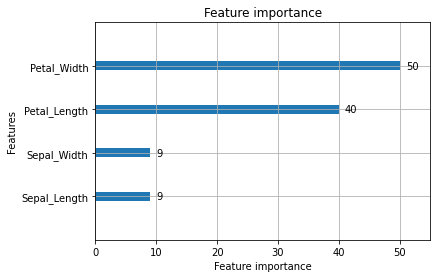

In [27]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt

feature_names = df.columns[0:4]
feature_names
ax = lgb.plot_importance(lgb_model)
ax.set_yticklabels(feature_names)
plt.show()

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Print the classification report
print('Classification Report:')
target_names = ['setosa', 'versicolor', 'virginica']
print(classification_report(y_test, y_test_pred, target_names=target_names))

# Print the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred))

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.89      0.94         9
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix:
[[11  0  0]
 [ 0  8  1]
 [ 0  0 10]]
